<a href="https://colab.research.google.com/github/krmonline/ReinforcementLearning/blob/main/Transfer_Bellman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fac1 = 4
fac2 = 9
fac3 = 2
n = 4
e = 6
w = 2
s = 3
total_stage = (fac1+1) * (fac2+1) * (fac3+1) * (n+1) * (e+1) * (w+1) * (s+1)
total_action = 13
Qtable = np.zeros([total_stage,total_action+1])
Qtable.shape
QtableCum = Qtable

In [3]:
df = pd.DataFrame(columns=['f1','f2','f3','n','e','w','s'])
MapRevTable = np.zeros([fac1+1,fac2+1,fac3+1,n+1,e+1,w+1,s+1])
facTable = np.zeros([total_stage]).astype("str")
num = 0
for i0 in range(s+1):
  for i1 in range(w+1):
    for i2 in range(e+1):
      for i3  in range(n+1):
        for i4 in range(fac3+1):
          for i5 in range(fac2+1):
            for i6 in range(fac1+1):
              #print(num,i6,i5,i4,i3,i2,i1)
              facTable[num] = str(i6)+","+str(i5)+","+str(i4)+","+str(i3)+","+str(i2)+","+str(i1)+","+str(i0)
              MapRevTable[i6][i5][i4][i3][i2][i1][i0] = num
              num = num+1
dfMapTable = pd.DataFrame(facTable,columns=['state'])

In [4]:
dfMapTable.tail()

,state
62995,"0,9,2,4,6,2,3"
62996,"1,9,2,4,6,2,3"
62997,"2,9,2,4,6,2,3"
62998,"3,9,2,4,6,2,3"
62999,"4,9,2,4,6,2,3"


In [5]:
def step(state,action,mby):
  #print("state=",state,"action=",action)
  maxF1 = 4
  maxF2 = 9
  maxF3 = 2
  maxn = 4
  maxe = 6
  maxw = 2
  maxs = 3
  r = 0
  stateText = dfMapTable.iloc[state]['state']
  #Conv state to array
  f1,f2,f3,n,e,w,s = stateText.split(",")
  f1,f2,f3,n,e,w,s = int(f1),int(f2),int(f3),int(n),int(e),int(w),int(s)
  #print(f1,f2,f3,n,e,w,s)
  #4,9,2,4,6,2,3 => f1,f2,f3,n,e,w,s
  #Defined Action 1-12
  r = -100
  oldResult = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  if action == 1:
    if f1 < maxF1 and n < maxn:
      f1 = f1 + 1
      n = n + 1 
      r = -7
      mby[0] = mby[0] + 1
  elif action == 2:
    if f1 < maxF1 and e < maxe:
      f1 = f1 + 1 
      r = -5
      e = e + 1
      mby[1] = mby[1] + 1
  elif action == 3:
    if f1 < maxF1 and w < maxw:
      f1 = f1 + 1 
      w = w + 1
      r = -5
      mby[2] = mby[2] + 1
  elif action == 4:
    if f1 < maxF1 and s < maxs:
      f1 = f1 + 1 
      s = s + 1
      r = -1
      mby[3] = mby[3] + 1
  elif action == 5:
    if f2 < maxF2 and n < maxn:
      f2 = f2 + 1
      n = n + 1
      r = -9
      mby[4] = mby[4] + 1
  elif action == 6:
    if f2 < maxF2 and e < maxe:
      f2 = f2 + 1
      e = e + 1
      r = -7
      mby[5] = mby[5] + 1
  elif action == 7:
    if f2 < maxF2 and w < maxw:
      f2 = f2 + 1
      w = w + 1
      r = -5
      mby[6] = mby[6] + 1
  elif action == 8:
    if f2 < maxF2 and s < maxs:
      f2 = f2 + 1 
      s = s + 1
      r = -2
      mby[7] = mby[7] + 1
  elif action == 9:
    if f3 < maxF3 and n < maxn:
      f3 = f3 + 1
      n = n + 1
      r = -4
      mby[8] = mby[8] + 1
  elif action == 10:
    if f3 < maxF3 and e < maxe:
      f3 = f3 + 1 
      e = e + 1
      r = -4
      mby[9] = mby[9] + 1
  elif action == 11:
    if f3 < maxF3 and w < maxw:
      f3 = f3 + 1 
      w = w + 1 
      r = -6 
      mby[10] = mby[10] + 1
  elif action == 12:
    if f3 < maxF3 and s < maxs:
      f3 = f3 + 1 
      s = s + 1 
      r = -4
      mby[11] = mby[1] + 1
  if(f1 == 4 and  f2 == 9 and f3 == 2):
    done = True

  else:
    done = False
  #print(f1,f2,f3,n,e,w,s)
  NextState  = int(MapRevTable[f1][f2][f3][n][e][w][s])
  Reward = r
  newResult = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  reward  = oldResult - newResult
  info = ""
  #print(int(NextState))
  return [NextState,Reward,done,info]

Episode: 1000


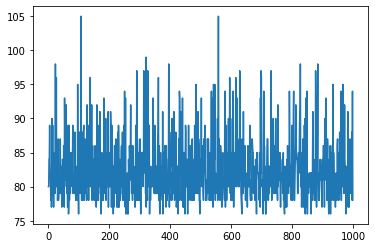

78.0
Episode: 2000


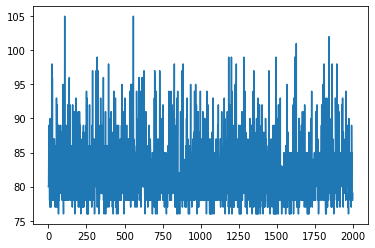

79.0
Episode: 3000


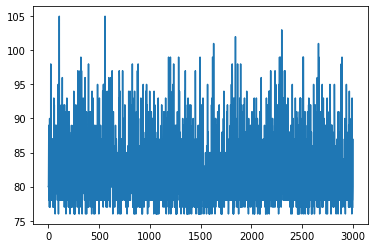

77.0
Episode: 4000


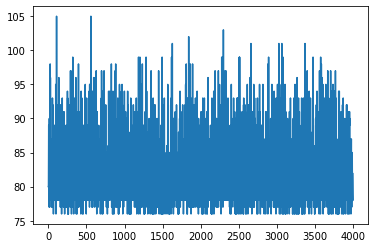

78.0
Episode: 5000


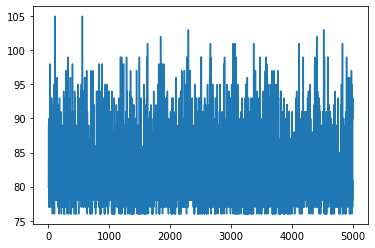

90.0
Episode: 6000


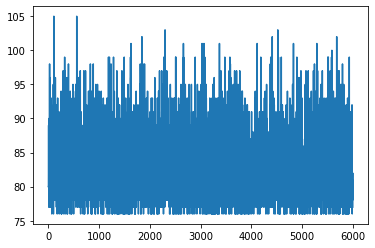

77.0


KeyboardInterrupt: ignored

In [7]:
# Hyperparameters
alpha = 0.8
gamma = 1
epsilon = 0.1
results  = []
# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 10001):
    state = 0

    epochs, penalties, reward, = 0, 0, 0
    done = False
    mby = np.zeros(12)
    while not done:
        if random.uniform(0, 1) < epsilon:
          action = random.randint(1,total_action) # Explore action space
        else:
            action = np.argmax(Qtable[state]) # Exploit learned values

        next_state, reward, done, info = step(state,action,mby) 
        
        old_value = Qtable[state,action]
        next_max = np.max(Qtable[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        Qtable[state,action] = new_value

        state = next_state
        epochs += 1
    result = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
    results.append(result)
    #print(mby,result)
    if i % 1000 == 0:
      #clear_output(wait=True)
      print(f"Episode: {i}")
      plt.plot(results)
      plt.show()
      print(result)
print("Training finished.\n")

In [ ]:
pd.DataFrame(Qtable)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-80.0,-75.997879,-75.997875,-76.02376,-75.998035,-75.997875,-75.997865,-75.997867,-75.997869,-75.997864,-76.000051,-76.007155,-76.061425
1,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62996,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62997,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62998,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
results  = []
# For plotting metrics
all_epochs = []
all_penalties = []

state = 0
epochs, penalties, reward, = 0, 0, 0
done = False
mby = np.zeros(12)
while not done:
    action = np.argmax(Qtable[state]) # Exploit learned values
    next_state, reward, done, info = step(state,action,mby) 
    next_max = np.max(Qtable[next_state])
    state = next_state
    epochs += 1
result = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
print(mby,result)
#clear_output(wait=True)
print(result)
print("Training finished.\n")

[1. 3. 0. 0. 1. 3. 2. 3. 2. 0. 0. 0.] 76.0
76.0
Training finished.



In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = False

        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters for the DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_dqn.h5")

    # approximate Q function using Neural Network
    # state is input and Q Value of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s'> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if len(self.memory) < self.train_start:
            return
        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        state = np.zeros((batch_size, self.state_size))
        next_state= np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(self.batch_size):
            state[i] = mini_batch[i][0]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            next_state[i] = mini_batch[i][3]
            done.append(mini_batch[i][4])

        state_Q = self.model.predict(state)
        next_state_Q = self.model.predict(next_state)

        for i in range(self.batch_size):
            # Q Learning: get maximum Q value at s' from target model
            if done[i]:
                state_Q[i][action[i]] = reward[i]
            else:
                state_Q[i][action[i]] = reward[i] + self.discount_factor * (
                    np.amax(next_state_Q[i]))

        # and do the model fit!
        self.model.fit(state, state_Q, batch_size=self.batch_size,
                       epochs=1, verbose=0)

In [ ]:
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(state_size, action_size)

scores, episodes = [], []

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        if agent.render:
            env.render()

        
        action = agent.get_action(state)

        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])

        # save replay memory
        agent.append_sample(state, action, reward, next_state, done)
        
        agent.train_model()
        score += reward
        state = next_state

        if done:              

            if score == 200:
                agent.render = True
                
            # graph
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            pylab.savefig("./save_graph/cartpole_dqn.png")
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon)

    # save the model
    if e % 50 == 0:
        agent.model.save_weights("./save_model/cartpole_dqn.h5")

NameError: ignored

#Dynamic Programming Bellman

In [ ]:
import sys
import gym
import matplotlib.pyplot as plt
import random
import numpy as np
import os.path
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

In [ ]:
state_size = 7
action_size = 12
learning_rate = 0.01
model = Sequential()
model.add(Dense(24, input_dim=state_size, activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dense(24, activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dense(action_size, activation='softmax',
                kernel_initializer='he_uniform'))
model.summary()
model.compile(loss='mse', optimizer=Adam(lr=learning_rate))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def append_sample(state, action, reward, next_state, done,epsilon_min,epsilon_decay,epsilon,memory):
    memory.append((state, action, reward, next_state, done))
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    return [epsilon,memory]

def train_model(model,memory,train_start,batch_size,state_size,discount_factor):
  #print("test")
  if len(memory) < train_start:
      return
  batch_size = min(batch_size, len(memory))
  mini_batch = random.sample(memory, batch_size)

  state = np.zeros((batch_size,state_size))
  next_state= np.zeros((batch_size, state_size))
  action, reward, done = [], [], []
  #print("batch1")
  for i in range(batch_size):
      state[i] = mini_batch[i][0]
      action.append(mini_batch[i][1])
      reward.append(mini_batch[i][2])
      next_state[i] = mini_batch[i][3]
      done.append(mini_batch[i][4])

  state_Q = model.predict(state)
  next_state_Q = model.predict(next_state)
  #print("batch2")
  for i in range(batch_size):
      # Q Learning: get maximum Q value at s' from target model
      if done[i]:
          state_Q[i][action[i]] = reward[i]
      else:
          #print(next_state_Q[i])
          #print(np.amax(next_state_Q[i]))
          #print(action,i,action[i])
          #print(reward,i,reward[i])
          state_Q[i][action[i]] = reward[i] + discount_factor * (
              np.amax(next_state_Q[i])
          )

  # and do the model fit!
  if os.path.isfile("./dql_weight.f5"):
    model.load_weights("./dql_weight.f5")
  history = model.fit(state, state_Q, batch_size=batch_size,
              epochs=1, verbose=0)
  model.save_weights("./dql_weight.f5")
  #print("end")
  return [model,history]

In [ ]:
def step2(state,action,mby):
  #print("state=",state,"action=",action)
  maxF1 = 4
  maxF2 = 9
  maxF3 = 2
  maxn = 4
  maxe = 6
  maxw = 2
  maxs = 3
  r = 0
  #print(state)
  f1,f2,f3,n,e,w,s = state
  #f1,f2,f3,n,e,w,s =int(f1),int(f2),int(f3),int(n),int(e),int(w),int(s)
  #print(f1,f2,f3,n,e,w,s)
  #4,9,2,4,6,2,3 => f1,f2,f3,n,e,w,s
  #Defined Action 1-12
  r = 0
  oldResult = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  if action == 1:
    if f1 < maxF1 and n < maxn:
      f1 = f1 + 1
      n = n + 1 
      r = -7 + 10
      mby[0] = mby[0] + 1
  elif action == 2:
    if f1 < maxF1 and e < maxe:
      f1 = f1 + 1 
      r = -5 + 10
      e = e + 1
      mby[1] = mby[1] + 1
  elif action == 3:
    if f1 < maxF1 and w < maxw:
      f1 = f1 + 1 
      w = w + 1
      r = -5 + 10
      mby[2] = mby[2] + 1
  elif action == 4:
    if f1 < maxF1 and s < maxs:
      f1 = f1 + 1 
      s = s + 1
      r = -1 + 10
      mby[3] = mby[3] + 1
  elif action == 5:
    if f2 < maxF2 and n < maxn:
      f2 = f2 + 1
      n = n + 1
      r = -9 + 10
      mby[4] = mby[4] + 1
  elif action == 6:
    if f2 < maxF2 and e < maxe:
      f2 = f2 + 1
      e = e + 1
      r = -7 + 10
      mby[5] = mby[5] + 1
  elif action == 7:
    if f2 < maxF2 and w < maxw:
      f2 = f2 + 1
      w = w + 1
      r = -5 + 10
      mby[6] = mby[6] + 1
  elif action == 8:
    if f2 < maxF2 and s < maxs:
      f2 = f2 + 1 
      s = s + 1
      r = -2 + 10
      mby[7] = mby[7] + 1
  elif action == 9:
    if f3 < maxF3 and n < maxn:
      f3 = f3 + 1
      n = n + 1
      r = -4 + 10
      mby[8] = mby[8] + 1
  elif action == 10:
    if f3 < maxF3 and e < maxe:
      f3 = f3 + 1 
      e = e + 1
      r = -4 + 10
      mby[9] = mby[9] + 1
  elif action == 11:
    if f3 < maxF3 and w < maxw:
      f3 = f3 + 1 
      w = w + 1 
      r = -6  + 10
      mby[10] = mby[10] + 1
  elif action == 12:
    if f3 < maxF3 and s < maxs:
      f3 = f3 + 1 
      s = s + 1 
      r = -4 + 10
      mby[11] = mby[1] + 1
  if(f1 == 4 and  f2 == 9 and f3 == 2):
    done = True
    r = r + 100
  else:
    done = False
  #print(f1,f2,f3,n,e,w,s)
  NextState  = [f1,f2,f3,n,e,w,s]
  Reward = r
  newResult = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  reward  = oldResult - newResult
  info = ""
  #print(int(NextState))
  return [NextState,Reward,done,info]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

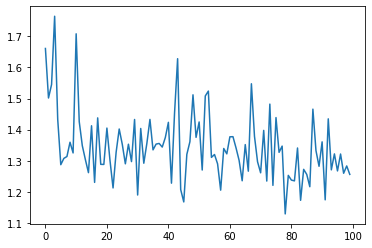

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

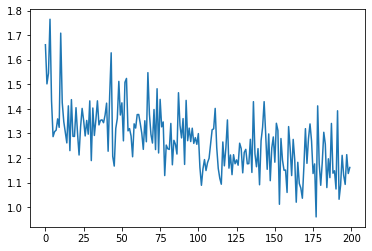

201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 

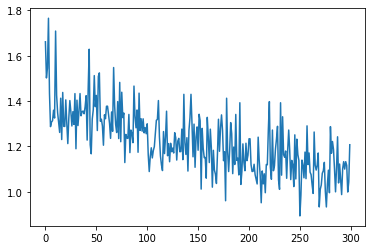

301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 

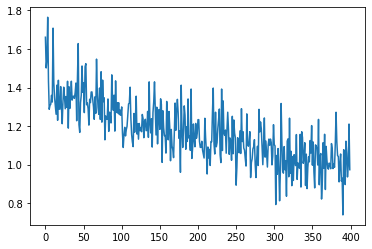

401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 

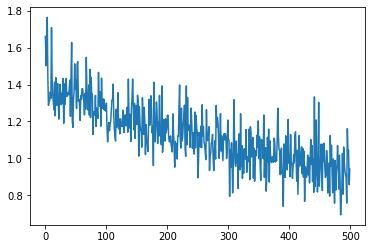

501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 

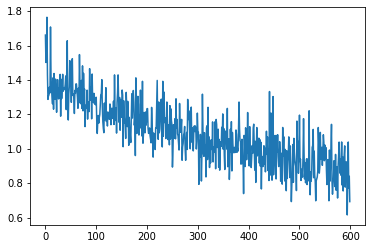

601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 

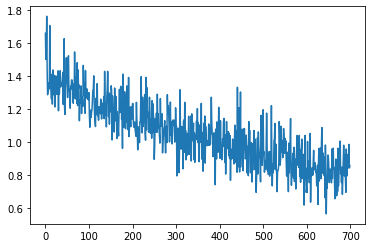

701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 

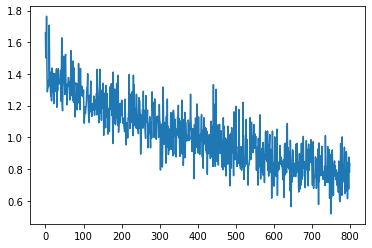

801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 

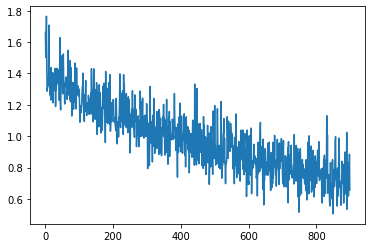

901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999 1000 

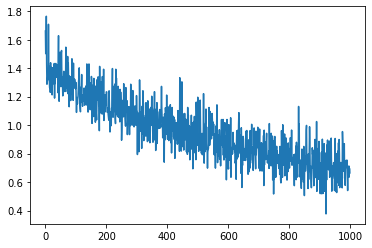

1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 

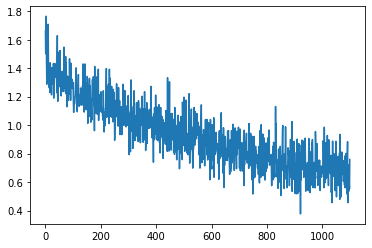

1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 

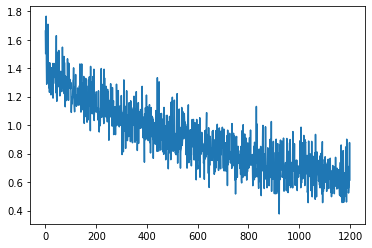

1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 

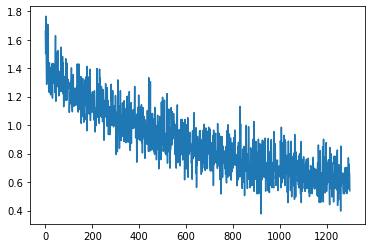

1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 

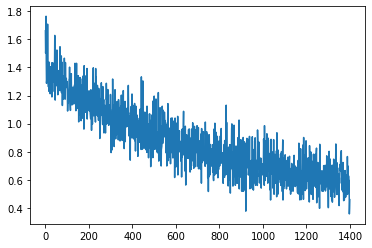

1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 

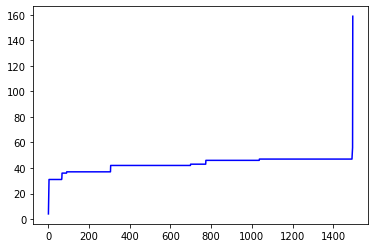

1
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

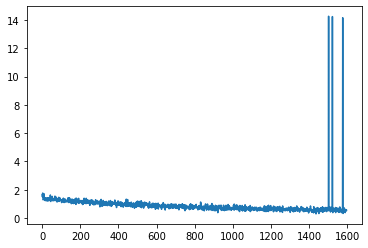

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

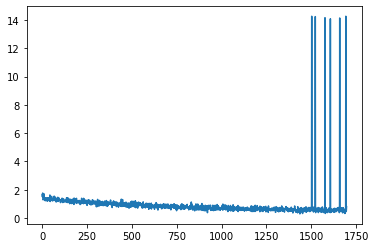

201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 

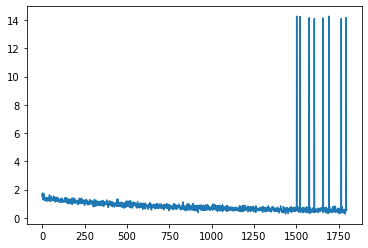

301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 

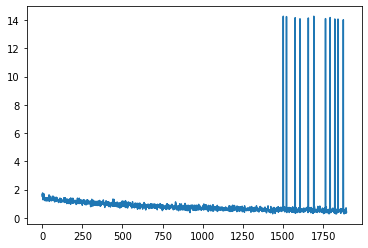

401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 

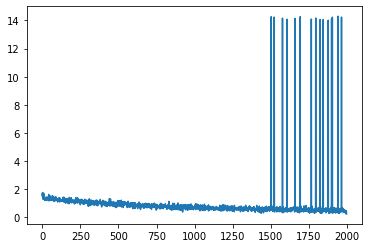

501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 

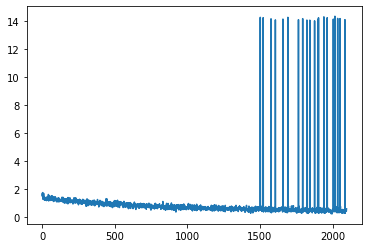

601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 

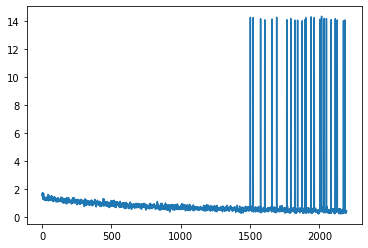

701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 

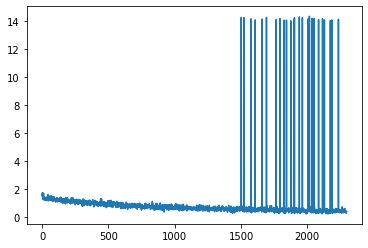

801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 

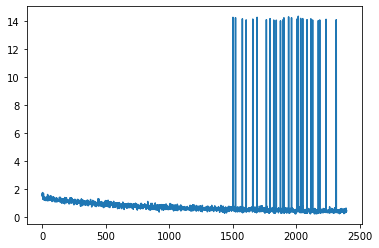

901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999 1000 

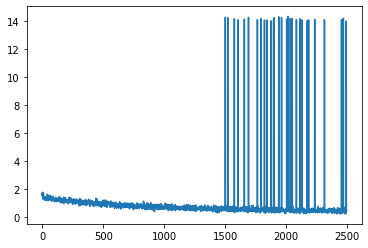

1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 

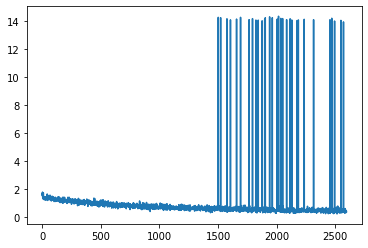

1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 

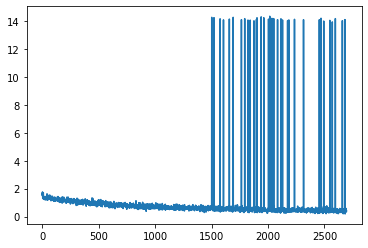

1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 

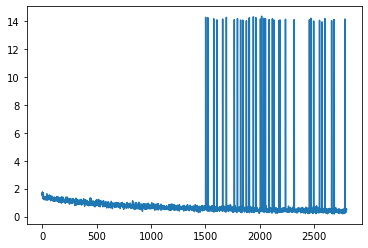

1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 

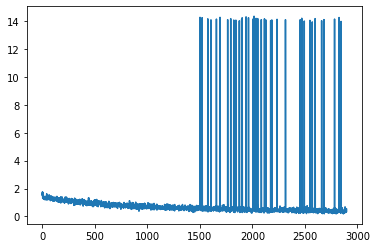

1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 

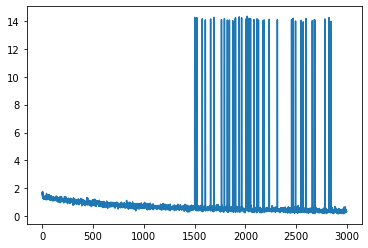

1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598 1599 1600 

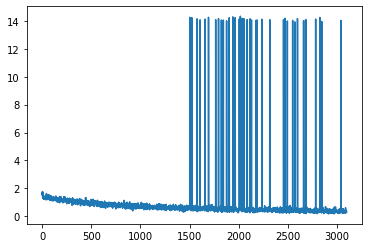

1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697 1698 1699 1700 

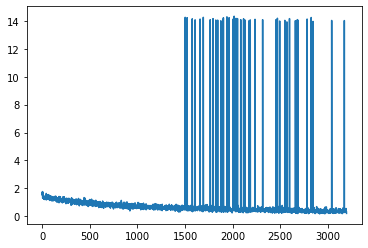

1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793 1794 1795 1796 1797 1798 1799 1800 

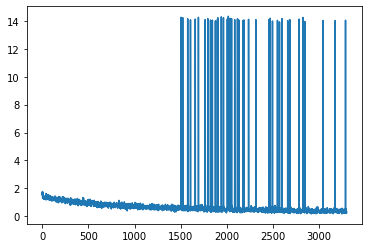

1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 

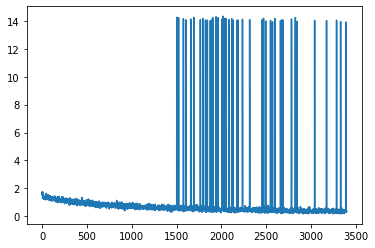

1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 

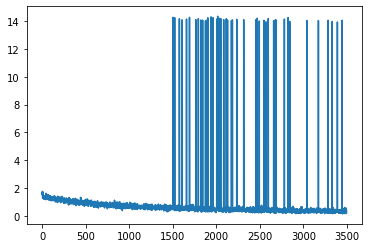

2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100 

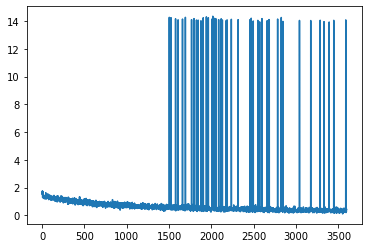

2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 

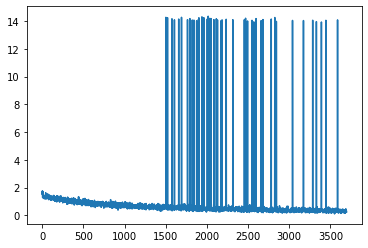

2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 

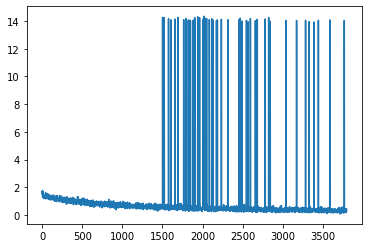

2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400 

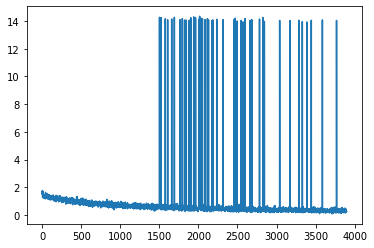

2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414 2415 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479 2480 2481 2482 2483 2484 2485 2486 2487 2488 2489 2490 2491 2492 2493 2494 2495 2496 2497 2498 2499 2500 

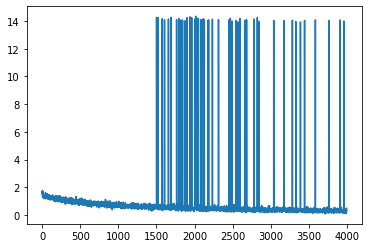

2501 2502 2503 2504 2505 2506 2507 2508 2509 2510 2511 2512 2513 2514 2515 2516 2517 2518 2519 2520 2521 2522 2523 2524 2525 2526 2527 2528 2529 2530 2531 2532 2533 2534 2535 2536 2537 2538 2539 2540 2541 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561 2562 2563 2564 2565 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2576 2577 2578 2579 2580 2581 2582 2583 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593 2594 2595 2596 2597 2598 2599 2600 

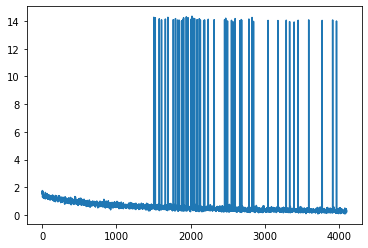

2601 2602 2603 2604 2605 2606 2607 2608 2609 2610 2611 2612 2613 2614 2615 2616 2617 2618 2619 2620 2621 2622 2623 2624 2625 2626 2627 2628 2629 2630 2631 2632 2633 2634 2635 2636 2637 2638 2639 2640 2641 2642 2643 2644 2645 2646 2647 2648 2649 2650 2651 2652 2653 2654 2655 2656 2657 2658 2659 2660 2661 2662 2663 2664 2665 2666 2667 2668 2669 2670 2671 2672 2673 2674 2675 2676 2677 2678 2679 2680 2681 2682 2683 2684 2685 2686 2687 2688 2689 2690 2691 2692 2693 2694 2695 2696 2697 2698 2699 2700 

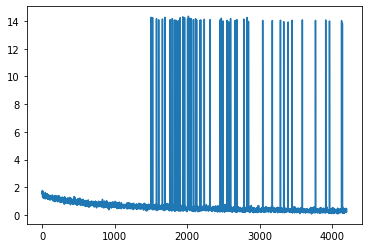

2701 2702 2703 2704 2705 2706 2707 2708 2709 2710 2711 2712 2713 2714 2715 2716 2717 2718 2719 2720 2721 2722 2723 2724 2725 2726 2727 2728 2729 2730 2731 2732 2733 2734 2735 2736 2737 2738 2739 2740 2741 2742 2743 2744 2745 2746 2747 2748 2749 2750 2751 2752 2753 2754 2755 2756 2757 2758 2759 2760 2761 2762 2763 2764 2765 2766 2767 2768 2769 2770 2771 2772 2773 2774 2775 2776 2777 2778 2779 2780 2781 2782 2783 2784 2785 2786 2787 2788 2789 2790 2791 2792 2793 2794 2795 2796 2797 2798 2799 2800 

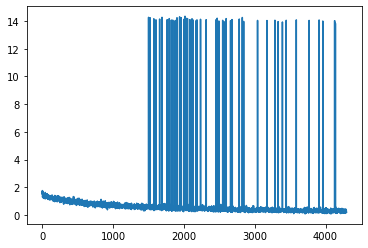

2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897 2898 2899 2900 

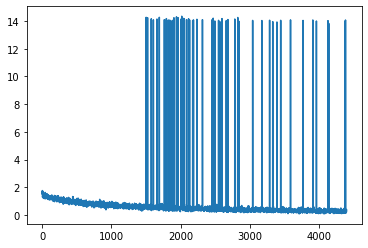

2901 2902 2903 2904 2905 2906 2907 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919 2920 2921 2922 2923 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936 2937 2938 2939 2940 2941 2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997 2998 2999 3000 

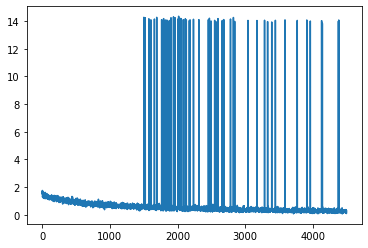

3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095 3096 3097 3098 3099 3100 

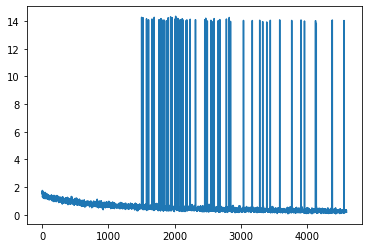

3101 3102 3103 3104 3105 3106 3107 3108 3109 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123 3124 3125 3126 3127 3128 3129 3130 3131 3132 3133 3134 3135 3136 3137 3138 3139 3140 3141 3142 3143 3144 3145 3146 3147 3148 3149 3150 3151 3152 3153 3154 3155 3156 3157 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3175 3176 3177 3178 3179 3180 3181 3182 3183 3184 3185 3186 3187 3188 3189 3190 3191 3192 3193 3194 3195 3196 3197 3198 3199 3200 

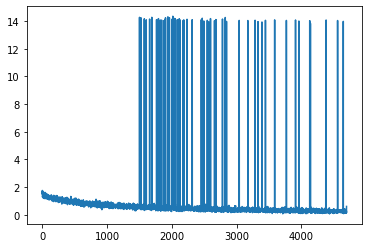

3201 3202 3203 3204 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214 3215 3216 3217 3218 3219 3220 3221 3222 3223 3224 3225 3226 3227 3228 3229 3230 3231 3232 3233 3234 3235 3236 3237 3238 3239 3240 3241 3242 3243 3244 3245 3246 3247 3248 3249 3250 3251 3252 3253 3254 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271 3272 3273 3274 3275 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285 3286 3287 3288 3289 3290 3291 3292 3293 3294 3295 3296 3297 3298 3299 3300 

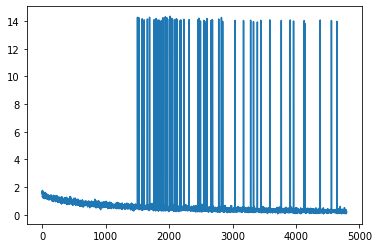

3301 3302 3303 3304 3305 3306 3307 3308 3309 3310 3311 3312 3313 3314 3315 3316 3317 3318 3319 3320 3321 3322 3323 3324 3325 3326 3327 3328 3329 3330 3331 3332 3333 3334 3335 3336 3337 3338 3339 3340 3341 3342 3343 3344 3345 3346 3347 3348 3349 3350 3351 3352 3353 3354 3355 3356 3357 3358 3359 3360 3361 3362 3363 3364 3365 3366 3367 3368 3369 3370 3371 3372 3373 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383 3384 3385 3386 3387 3388 3389 3390 3391 3392 3393 3394 3395 3396 3397 3398 3399 3400 

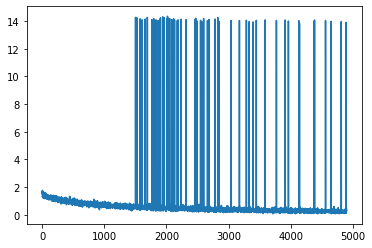

3401 3402 3403 3404 3405 3406 3407 3408 3409 3410 3411 3412 3413 3414 3415 3416 3417 3418 3419 3420 3421 3422 3423 3424 3425 3426 3427 3428 3429 3430 3431 3432 3433 3434 3435 3436 3437 3438 3439 3440 3441 3442 3443 3444 3445 3446 3447 3448 3449 3450 3451 3452 3453 3454 3455 3456 3457 3458 3459 3460 3461 3462 3463 3464 3465 3466 3467 3468 3469 3470 3471 3472 3473 3474 3475 3476 3477 3478 3479 3480 3481 3482 3483 3484 3485 3486 3487 3488 3489 3490 3491 3492 3493 3494 3495 3496 3497 3498 3499 3500 

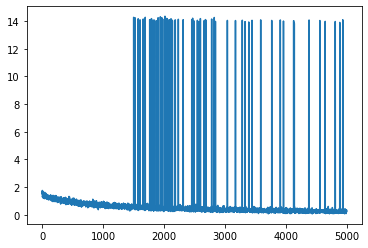

3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 

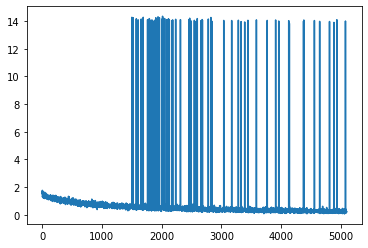

3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 

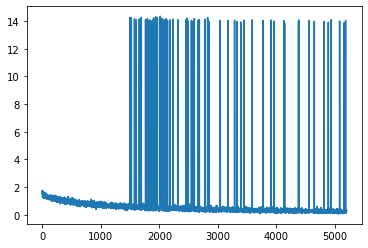

3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 

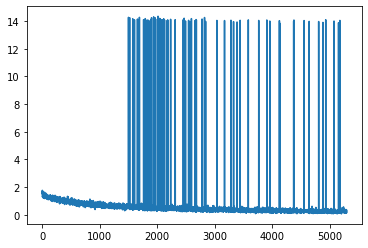

3801 3802 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858 3859 3860 3861 3862 3863 3864 3865 3866 3867 3868 3869 3870 3871 3872 3873 3874 3875 3876 3877 3878 3879 3880 3881 3882 3883 3884 3885 3886 3887 3888 3889 3890 3891 3892 3893 3894 3895 3896 3897 3898 3899 3900 

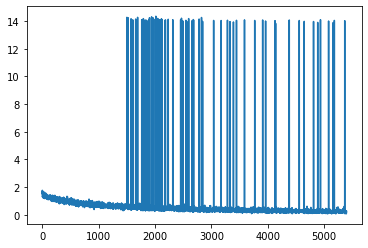

3901 3902 3903 3904 3905 3906 3907 3908 3909 3910 3911 3912 3913 3914 3915 3916 3917 3918 3919 3920 3921 3922 3923 3924 3925 3926 3927 3928 3929 3930 3931 3932 3933 3934 3935 3936 3937 3938 3939 3940 3941 3942 3943 3944 3945 3946 3947 3948 3949 3950 3951 3952 3953 3954 3955 3956 3957 3958 3959 3960 3961 3962 3963 3964 3965 3966 3967 3968 3969 3970 3971 3972 3973 3974 3975 3976 3977 3978 3979 3980 3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 3991 3992 3993 3994 3995 3996 3997 3998 3999 4000 

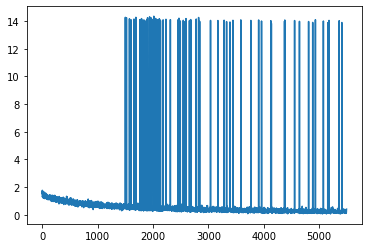

4001 4002 4003 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013 4014 4015 4016 4017 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027 4028 4029 4030 4031 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041 4042 4043 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055 4056 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070 4071 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083 4084 4085 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097 4098 4099 4100 

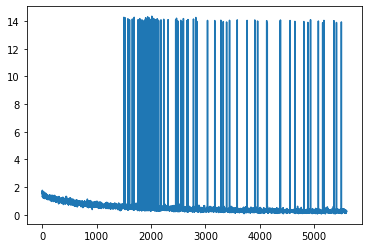

4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111 4112 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125 4126 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139 4140 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153 4154 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167 4168 4169 4170 

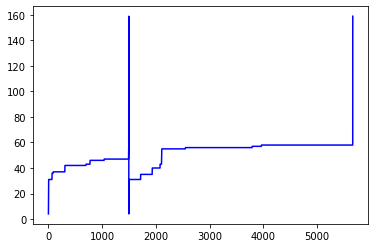

2
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

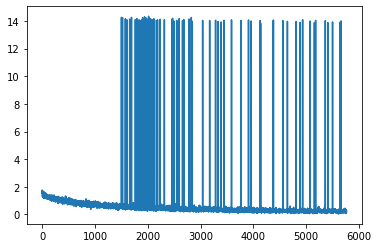

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

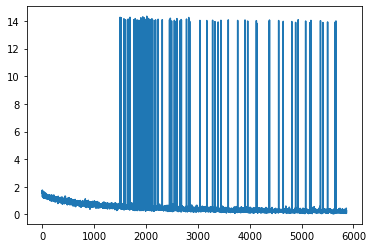

201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 

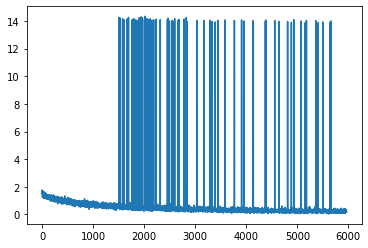

301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 

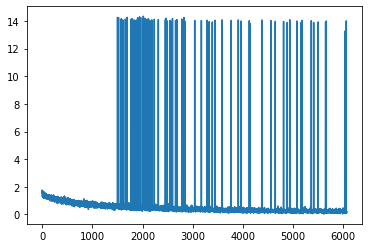

401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 

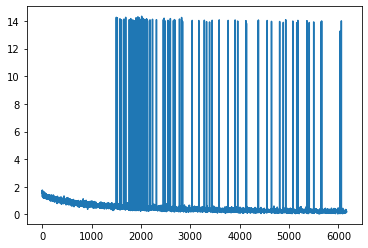

501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 

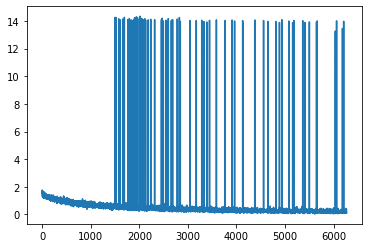

601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 

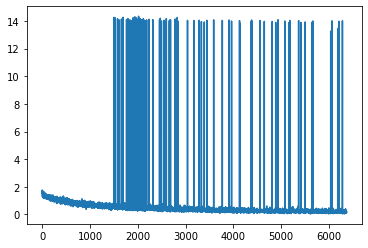

701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 

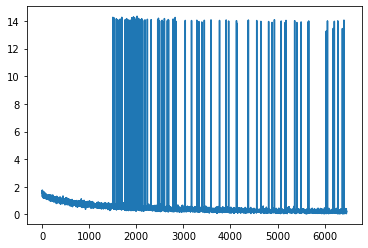

801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 

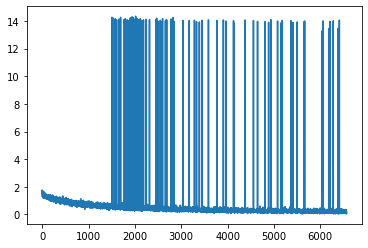

901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999 1000 

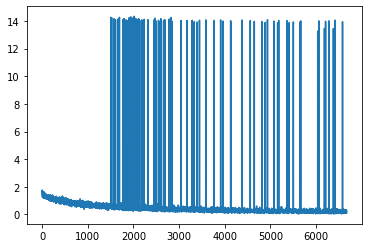

1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 

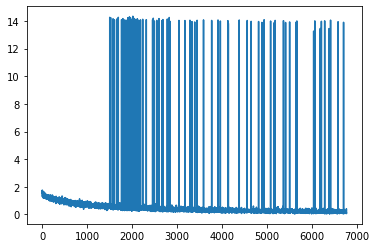

1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 

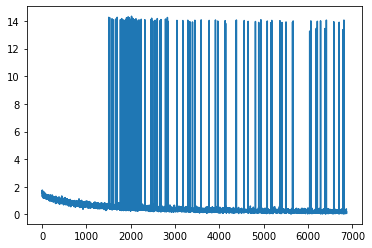

1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 

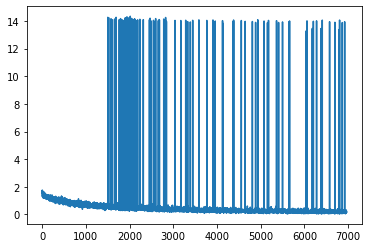

1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 

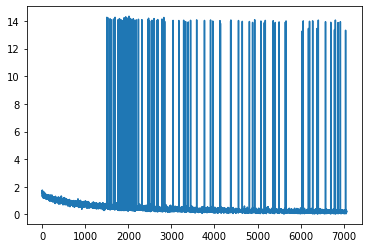

1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 

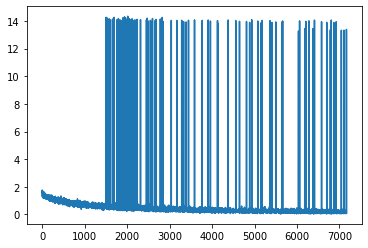

1501 1502 1503 1504 1505 1506 1507 1508 

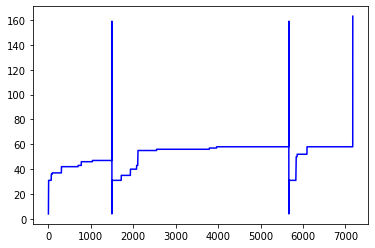

3
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

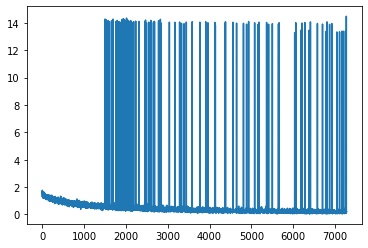

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

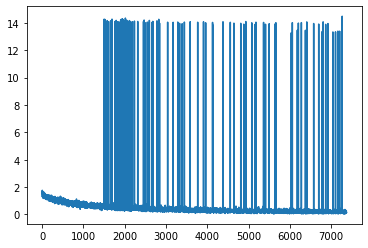

201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 

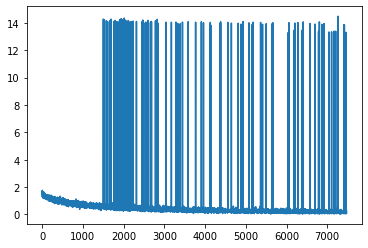

301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 

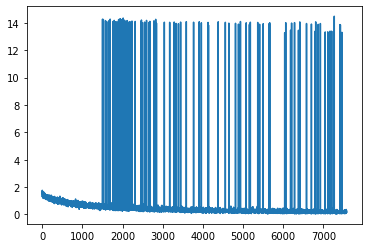

401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 

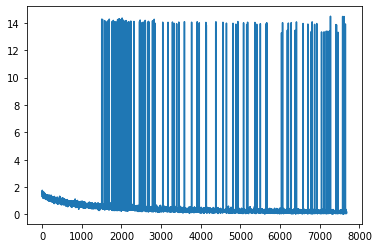

501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 

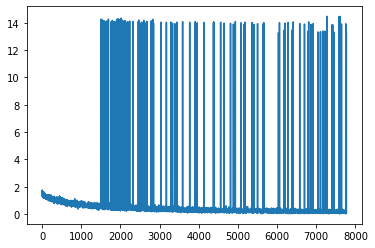

601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 

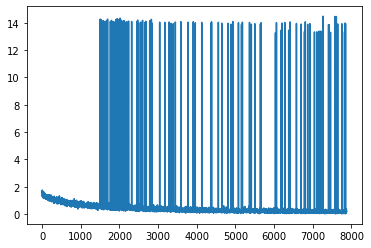

701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 

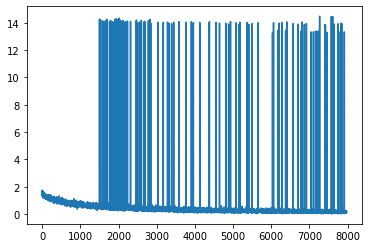

801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 

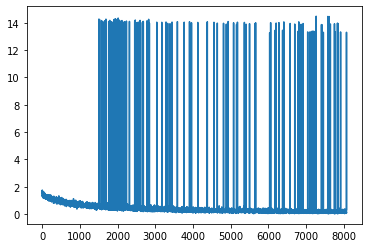

901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999 1000 

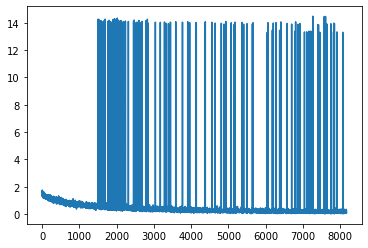

1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 

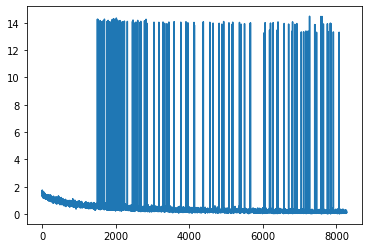

1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 

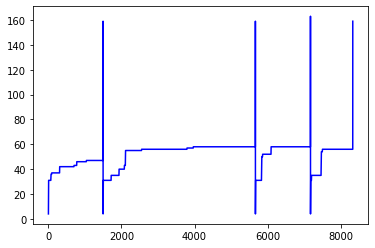

4


In [ ]:
# Hyperparameters
alpha = 0.8
gamma = 0.8
epsilon = 0.1
epsilon_decay = 0.999
discount_factor = 0.9
epsilon_min = 0.01
train_start = 1000
batch_size  = 64
total_action = 12
results  = []
# For plotting metrics
all_epochs = []
all_penalties = []
memory = []
scores = []
episodes = []
mse_loss = []
for i in range(1,5):
  state = np.array([0,0,0,0,0,0,0])
  score = 0
  epochs, penalties, reward, = 0, 0, 0
  done = False
  mby = np.zeros(12)
  while not done:
      if np.random.rand() <= epsilon:
        action = random.randrange(action_size)
      #if random.uniform(0, 1) < epsilon:
      #  action = random.randint(1,total_action) # Explore action space
      else:
          #action = np.argmax(Qtable[state]) # Exploit learned values
          q_value = model.predict(np.array(state).reshape(1,-1))
          action = np.argmax(q_value[0])

      next_state, reward, done, info = step2(state,action,mby)
      #print(next_state)
      #state2 = np.reshape(state, [1, state_size])
      #next_state2 = np.reshape(next_state, [1, state_size]) #DQN
      epsilon,memory = append_sample(state, action, reward, next_state, done,epsilon_min,epsilon_decay,epsilon,memory) #DQN

      
      #old_value = Qtable[state,action]
      #next_max = np.max(Qtable[next_state])
      
      #new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
      #Qtable[state,action] = new_value
      #print(model,memory,train_start,batch_size,state_size,discount_factor)
      result = train_model(model,memory,train_start,batch_size,state_size,discount_factor)
      if result: 
        model,history = result
        score += reward
        state = next_state
        epochs += 1
        print(epochs,end=" ")
        scores.append(score)
        mse_loss.append(history.history['loss'])
        if epochs % 100  ==  0:
          plt.plot(mse_loss)
          plt.show()

        #episodes.append(i)
  #result = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  #results.append(result)
  #print(mby,result)
  plt.plot(scores, 'b')
  plt.show()
  print(i)
#print(result)

In [ ]:
tmp = model.predict(np.array([1,0,0,1,0,0,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))

[[2.8992233e-01 8.2844007e-04 5.1922191e-02 5.1709430e-06 2.8391381e-05
  1.2405255e-01 7.9711057e-02 8.5749258e-07 5.6358761e-08 1.2730463e-07
  1.3469825e-04 4.5339414e-01]]
11


In [ ]:
tmp = model.predict(np.array([2,0,0,1,0,1,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))

[[3.0239286e-02 1.1883694e-02 1.6711657e-01 2.3711487e-05 1.3033175e-03
  3.4503174e-01 3.0354539e-01 1.8332056e-04 4.8561031e-07 7.1751504e-07
  2.7462729e-04 1.4039718e-01]]
5


In [ ]:
tmp = model.predict(np.array([2,1,0,2,0,1,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))

[[2.3287630e-03 4.7547635e-02 2.5335005e-01 2.5971967e-05 6.2396247e-03
  3.0201364e-01 3.2237613e-01 1.2961196e-03 6.6759412e-07 1.0862526e-06
  1.4161233e-04 6.4678699e-02]]
6


In [ ]:
tmp = model.predict(np.array([2,2,0,2,0,2,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))

[[2.1941385e-03 8.3040059e-02 2.8845090e-01 2.9467046e-05 7.0682378e-03
  2.9525587e-01 2.7776039e-01 2.1605326e-03 9.6142867e-07 1.6412309e-06
  1.4439301e-04 4.3893419e-02]]
5


In [ ]:
tmp = model.predict(np.array([2,3,0,3,0,2,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))

[[2.1716463e-03 8.3752394e-02 2.8980651e-01 2.9343097e-05 7.0822123e-03
  2.9443285e-01 2.7682355e-01 2.1627899e-03 9.5972382e-07 1.6462018e-06
  1.4359044e-04 4.3592606e-02]]
5


In [ ]:
tmp = model.predict(np.array([2,4,0,4,0,2,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))

[[2.1716463e-03 8.3752394e-02 2.8980651e-01 2.9343097e-05 7.0822123e-03
  2.9443285e-01 2.7682355e-01 2.1627899e-03 9.5972382e-07 1.6462018e-06
  1.4359044e-04 4.3592606e-02]]
5


In [ ]:
tmp = model.predict(np.array([2,4,0,4,0,2,0]).reshape(1,-1))
print(tmp)
print(np.argmax(tmp[0]))